In [2]:
%store -r top_tracks
import pandas as pd 

pd.set_option('display.max_colwidth', None)
top_tracks['preview_url']

1     https://p.scdn.co/mp3-preview/59f68f3e96233e3c352659053dd48039790cd965?cid=5f736022721243569883acdc831ebc90
2     https://p.scdn.co/mp3-preview/fc780d2d7634024c170723c769cca145d298e53f?cid=5f736022721243569883acdc831ebc90
3     https://p.scdn.co/mp3-preview/6890d6f0749ecec39ce0bc1811b144ba1c19f7ee?cid=5f736022721243569883acdc831ebc90
4     https://p.scdn.co/mp3-preview/8fc181a40905456c5d8084ba2fe26e469319baba?cid=5f736022721243569883acdc831ebc90
5     https://p.scdn.co/mp3-preview/c98feacb51b83d5a0490ea9886a5b25a7f4afec7?cid=5f736022721243569883acdc831ebc90
6     https://p.scdn.co/mp3-preview/dac105442fc83b3b2a8cbd238ffa9d898d73e805?cid=5f736022721243569883acdc831ebc90
7     https://p.scdn.co/mp3-preview/150814aafbffda9f179776fba32b4620b4d87c1a?cid=5f736022721243569883acdc831ebc90
8     https://p.scdn.co/mp3-preview/3cc58eff7a43e53f29af0f5fb0dc29f76c6819c5?cid=5f736022721243569883acdc831ebc90
9     https://p.scdn.co/mp3-preview/37beb1785c5a3f9fa734af22d64571d42449fe22?cid=5f73602

In [14]:
import requests
import os

# Create a folder to save the MP3 files
output_folder = 'tracks'
os.makedirs(output_folder, exist_ok=True)

def download_mp3(url, filename):
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Check if the request was successful

        with open(filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"Downloaded {filename}")
    except requests.exceptions.RequestException as e:
        print(f"Failed to download {url}: {e}")

# Download each URL
for i, track in enumerate(top_tracks['preview_url']):
    filename = os.path.join(output_folder, f"track_{i+1}.mp3")
    download_mp3(track, filename)


Downloaded tracks/track_1.mp3
Downloaded tracks/track_2.mp3
Downloaded tracks/track_3.mp3
Downloaded tracks/track_4.mp3
Downloaded tracks/track_5.mp3
Downloaded tracks/track_6.mp3
Downloaded tracks/track_7.mp3
Downloaded tracks/track_8.mp3
Downloaded tracks/track_9.mp3
Downloaded tracks/track_10.mp3
Downloaded tracks/track_11.mp3
Downloaded tracks/track_12.mp3
Downloaded tracks/track_13.mp3
Downloaded tracks/track_14.mp3
Downloaded tracks/track_15.mp3
Downloaded tracks/track_16.mp3
Downloaded tracks/track_17.mp3
Downloaded tracks/track_18.mp3
Downloaded tracks/track_19.mp3
Downloaded tracks/track_20.mp3
Downloaded tracks/track_21.mp3
Downloaded tracks/track_22.mp3
Downloaded tracks/track_23.mp3
Downloaded tracks/track_24.mp3
Downloaded tracks/track_25.mp3
Downloaded tracks/track_26.mp3
Downloaded tracks/track_27.mp3
Downloaded tracks/track_28.mp3
Downloaded tracks/track_29.mp3
Downloaded tracks/track_30.mp3
Downloaded tracks/track_31.mp3
Downloaded tracks/track_32.mp3
Downloaded tracks

In [3]:
import os

def classify_songs(hiphop_folder, nothiphop_folder):
    song_data = []

    for song in os.listdir(hiphop_folder):
        if song.endswith(('.wav')):  
            song_data.append({'song': song, 'category': 'HipHop'})

    for song in os.listdir(nothiphop_folder):
        if song.endswith(('.wav')):  # Check if the file is a song
            song_data.append({'song': song, 'category': 'NotHipHop'})

    df = pd.DataFrame(song_data)
    
    return df

# Paths to your folders
hiphop_folder = 'wavs/HipHop'
nothiphop_folder = 'wavs/NotHipHop'

df = classify_songs(hiphop_folder, nothiphop_folder)
df


song   category
0   track_10.wav     HipHop
1   track_11.wav     HipHop
2   track_12.wav     HipHop
3   track_16.wav     HipHop
4   track_14.wav     HipHop
5    track_9.wav     HipHop
6    track_2.wav     HipHop
7    track_3.wav     HipHop
8    track_7.wav     HipHop
9    track_5.wav     HipHop
10  track_18.wav     HipHop
11  track_13.wav  NotHipHop
12  track_17.wav  NotHipHop
13  track_15.wav  NotHipHop
14   track_8.wav  NotHipHop
15   track_1.wav  NotHipHop
16   track_6.wav  NotHipHop
17   track_4.wav  NotHipHop
18  track_25.wav  NotHipHop
19  track_19.wav  NotHipHop
20  track_24.wav  NotHipHop
21  track_23.wav  NotHipHop
22  track_22.wav  NotHipHop
23  track_20.wav  NotHipHop
24  track_21.wav  NotHipHop

__PreProcessing__

In [4]:

!pip install librosa

import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow_io as tfio


In [30]:
# HipHop = os.path.join('tracks', 'HipHop', 'track_2.mp3')
# NotHipHop = os.path.join('tracks','NotHipHop', 'track_1.mp3')
print(tf.__version__)
print(tfio.__version__)
print(os.environ['PATH'])
#make sure the tf and tfio are compatible versions that use the same python interpreter, can check on tensorflow github
#can run juypter server by running in terminal "juypter notebook" and then launching kernel with that local http url

2.16.1
0.37.0
/usr/local/bin:/Users/fluffy/Library/Python/3.11/bin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/Library/Frameworks/Python.framework/Versions/3.11/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Library/Apple/usr/bin:/Library/Frameworks/Python.framework/Versions/3.12/bin:/Library/Frameworks/Python.framework/Versions/3.11/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/Users/fluffy/.nvm/versions/node/v18.18.0/bin:/path/to/driver:/Library/Frameworks/Python.framework/Versions/3.12/bin:/Library/Frameworks/Python.framework/Versions/3.11/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.crypt

In [6]:
import IPython.display as ipd
import librosa
import librosa.display

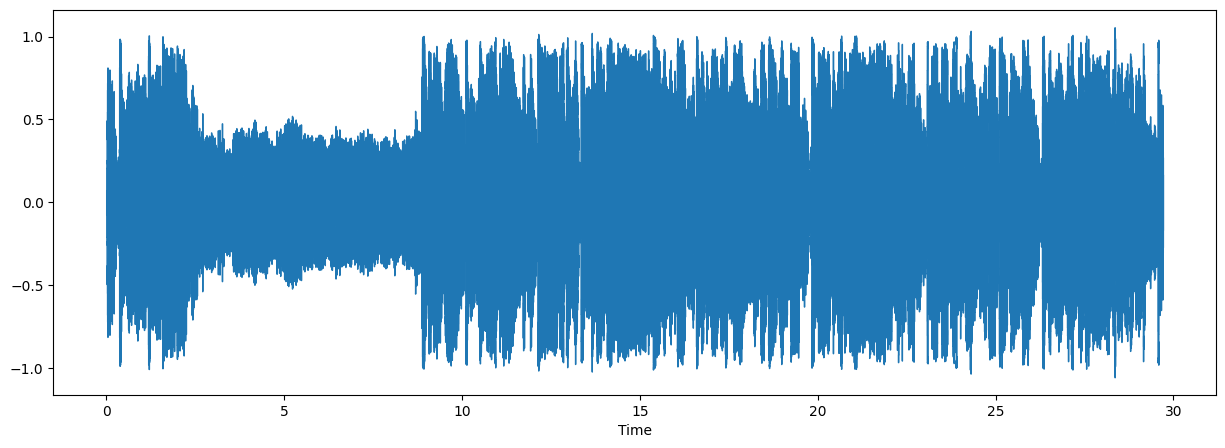

In [9]:
filename = 'wavs/HipHop/track_2.wav'
plt.figure(figsize=(15,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(y = data, sr=sample_rate)
ipd.Audio(filename)


In [10]:
#how many times per second our audio is being sampled, which is about 22 kHz (kilohertz)
sample_rate

22050

In [11]:
#librosa is actually flattening/normalizing our sample rate from our file to 22050 when it was originally 44100
#helps make it mono (one) signal

from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)
wave_sample_rate

44100

In [12]:
#this is two channels, not the mono we did in librosa
wave_audio


array([[-283, -201],
       [-345, -264],
       [-384, -319],
       ...,
       [  61,  115],
       [ 162,  225],
       [  37,   66]], dtype=int16)

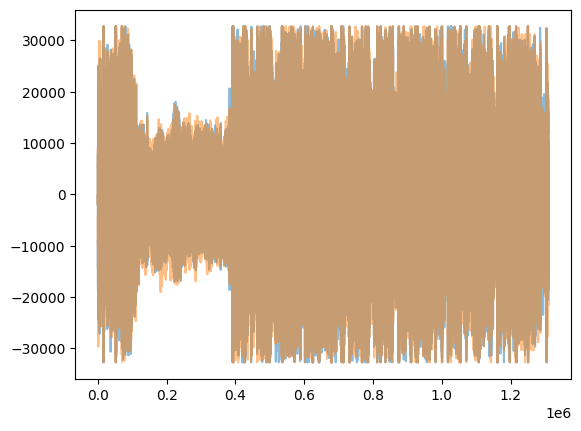

In [13]:
plt.plot(wave_audio, alpha = 0.5)

In [14]:
data
# has been normalized from -1 to 1 
print(max(data))
print(min(data))
data

1.0345684
-1.0564404


array([-0.00595463, -0.01113123, -0.01478518, ...,  0.00084818,
       -0.00111757,  0.00433311], dtype=float32)


**Extract Features**


Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [15]:
mfccs = librosa.feature.mfcc(y = data, sr= sample_rate, n_mfcc = 50)
print(mfccs.shape)

(50, 1280)


In [16]:

mfccs


array([[-88.9017   , -34.158077 , -22.027544 , ..., -64.09054  ,
        -62.054413 , -72.30653  ],
       [ 99.4808   ,  95.03238  ,  98.55412  , ...,  78.790405 ,
         70.00847  ,  73.76504  ],
       [  9.377617 ,   4.8901024,  -6.016714 , ...,  28.85334  ,
         24.9063   ,  19.63852  ],
       ...,
       [ -2.2120059,  -4.751051 ,  -0.5322962, ...,   4.131207 ,
         -1.9853101,  -3.6471822],
       [  1.4476588,   1.9725046,   1.090497 , ...,  -5.5579395,
        -11.158829 ,  -8.787134 ],
       [  3.135461 ,   5.592785 ,   3.998744 , ...,   5.783938 ,
          6.329494 ,   6.987714 ]], dtype=float32)

In [17]:
def find_features(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [19]:
import numpy as np
from tqdm import tqdm

audio_dataset_path = 'wavs'

features = []
for index_num,row in tqdm(df.iterrows()):
    file_name = os.path.join(os.path.relpath(audio_dataset_path),str(row["category"])+'/',str(row["song"]))
    final_class_labels=row["category"]
    data=find_features(file_name)
    features.append([data,final_class_labels])



25it [00:07,  3.32it/s]


In [35]:
extracted_features_df=pd.DataFrame(features,columns=['feature','category'])
extracted_features_df.head()

feature  \
0  [-0.15460777, 88.37185, -0.15230179, 30.374783, 2.2952752, 17.284115, -10.651602, 14.797531, -12.8341465, 19.039846, -6.567331, 19.430964, -5.670556, 10.638799, -6.322617, 7.521254, -3.8591704, 11.526507, 1.2960404, 6.365037, -3.5950375, 9.917756, -0.5481284, 8.31543, -2.7028685, 2.7049103, -5.162005, -1.3651502, -3.840812, 2.489013, -4.694655, -0.2701829, 0.24991608, 5.4412255, 3.5432785, 6.3050003, 0.049312256, 0.77262676, -1.0347528, 1.9731811, 1.2384676, 0.17502263, 1.657676, 1.1823413, -0.20777564, 2.4038157, 1.3090528, 1.951371, -1.9778874, -3.3251731]   
1       [-26.42995, 103.6512, 3.6628985, 43.984894, -1.6343333, 25.646896, -8.087636, 17.241634, -6.0047135, 13.021161, -6.3869963, 9.913994, -6.238881, 4.319315, -3.7869637, 6.8112497, -3.8541946, 6.279354, -3.7832808, 8.018435, -1.5760376, 4.36021, -0.80439216, 1.6582886, -0.80539876, 2.718186, 1.589462, 4.1291704, 1.5045782, 3.26712, -1.4273572, 3.1288273, 2.0136735, 4.272475, 1.4078586, 3.3755906, 1.065507, 2.3943295, 0.21407172, 1.5102612, 2.043589, 0.6237124, 0.9021244, -1.0347053, -0.50196725, 0.11871276, -0.30378327, 0.67227876, 0.21438065, -0.91758364]   
2        [-40.54665, 105.85288, 13.0890255, 15.8034, -10.701006, 18.686573, -12.931203, 16.637243, -19.536495, 13.832359, -12.572009, 8.464635, -10.666269, 7.8429728, -10.89236, 10.910536, -12.083776, 2.429829, -9.31071, 4.0664916, -8.587218, 2.817552, -6.676009, 1.7006239, -6.874152, 2.8046098, -5.7785964, 2.2762146, -0.907944, -4.072545, -8.333338, 1.4428835, -0.28785783, 1.7355331, -4.8533936, -2.5500531, -8.643106, -2.1303005, -4.3341026, -1.6437505, 0.83921736, 5.882605, 4.391967, -0.0545403, -5.281971, -4.469647, -4.317046, 2.7997289, 2.278595, -5.652077]   
3  [-69.646576, 103.74166, 5.546401, 30.710546, 3.642971, 17.298468, -6.426937, 12.376141, -5.9459586, 14.598213, -5.5829954, 10.676867, -0.86890185, 8.912008, -4.7583694, 12.830034, -7.3221908, 15.240061, -0.98636436, 6.477227, -4.8109245, 4.647382, -3.8744903, 1.8381717, -3.7517898, 0.38821334, -1.2656637, 0.6810362, -3.8313813, -0.38982964, 0.0065544606, 0.85154617, 0.7390948, -1.245891, 3.303779, 4.705378, 4.449189, 5.602465, 4.276429, 1.108709, -1.220183, -2.2581544, -0.7094346, 0.8780557, -0.1181944, 0.8156927, 0.4027319, -0.78251666, 3.378175, 3.3631737]   
4   [-39.221752, 113.556015, 7.2332544, 28.615524, -0.7842835, 23.09229, -5.035722, 14.545553, -14.490489, 20.538412, -8.884511, 14.984881, -3.5155873, 5.9871993, -1.2420912, 8.7983265, -6.399727, 6.9476333, 1.2224305, 8.306161, -0.89087933, 6.0744324, -3.5814033, 6.8259254, 1.8609326, 6.482582, 1.9563167, 5.6568027, 0.4102165, 4.837136, 2.239251, 0.675115, -5.1134214, -0.82890767, 0.17048766, 3.1077526, 1.7040787, 1.7739451, 1.2123499, 4.1695695, 0.36227375, -3.1050377, -4.4487686, -2.3898566, -0.6187504, 0.38449705, 0.11414476, 1.9894383, 3.1914227, 4.335995]   

  category  
0   HipHop  
1   HipHop  
2   HipHop  
3   HipHop  
4   HipHop

In [31]:
X = np.array(extracted_features_df['feature'].tolist())
Y = np.array(extracted_features_df['category'].tolist())

In [32]:
X.shape

(25, 50)

In [38]:
y = np.array(pd.get_dummies(Y))
y.shape

(25, 2)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.5,random_state= 0)

In [42]:
print(X_train.shape) 
print(X_test.shape) 

(12, 50)
(13, 50)


In [52]:
X_train.shape

(12, 50)

In [48]:
y

array([[ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True]])

In [49]:
Y_test.shape

(13, 2)

Model Training

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from sklearn.metrics import accuracy_score


In [51]:
## my y tells me my classification - hip hop or not hip hop
num_labels = y.shape[1]
num_labels

2

In [54]:
model = Sequential()
#layer 1
model.add(Dense(100,input_shape = (50,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#layer 2
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#layer 3
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#layer 4
model.add(Dense(num_labels))
model.add(Activation('softmax'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           402 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,902 (257.43 KB)

 Trainable params: 65,902 (257.43 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [64]:
#Model training
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='SavedModels/audio_classification.keras', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, Y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, Y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.4167 - loss: 12.9495
Epoch 1: val_loss improved from inf to 1.07326, saving model to SavedModels/audio_classification.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step - accuracy: 0.4167 - loss: 12.9495 - val_accuracy: 0.5385 - val_loss: 1.0733
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3333 - loss: 10.6433
Epoch 2: val_loss did not improve from 1.07326
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3333 - loss: 10.6433 - val_accuracy: 0.5385 - val_loss: 1.2989
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2500 - loss: 14.0790
Epoch 3: val_loss did not improve from 1.07326
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.2500 - loss: 14.0790 - val_accuracy: 0.6154 - val_loss: 1.4388
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5000 - loss: 7.2352
Epoch 4: val_loss did not improve from 1.07326
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 7.2352 - val_accu

In [67]:
test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(test_accuracy[1])

0.38461539149284363
